In [4]:
import librosa
import soundfile
import numpy as np
import os, glob, pickle
import librosa.display
from librosa import display
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from IPython.display import Audio

Labels for each type of datasets

In [5]:
emotions_cremad={
  'ANG':'angry',
  'DIS':'disgust',
  'NEU':'neutral',
  'HAP':'happy',
  'FEA':'fearful',
  'SAD':'sad'
}

emotions_ravdess={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

emotions_intensity = {
  '01':'low',
  '02':'strong',
}

observed_emotions=['neutral','angry','happy']

# def gender(g):
#     if int(g[0:2]) % 2 == 0:
#         return 'female'
#     else:
#         return 'male'

In [6]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

Extracting features from each audio file and adding it into stack

In [7]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    result=np.hstack((result, mfccs))
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
    mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result

Loading data from two datasets

In [8]:
def load_data(test_size=0.25):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\User\\Desktop\\diploma\\diploma\\backend\\emotion-recognition\\ravdess\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions_ravdess[file_name.split("-")[2]] 
        if emotions_ravdess[file_name.split("-")[2]] not in observed_emotions:
            continue
        feature=extract_feature(file)
        x.append(feature)
        y.append(emotion)
    for file in glob.glob("C:\\Users\\User\\Desktop\\diploma\\diploma\\backend\\emotion-recognition\\cremad\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions_cremad[file_name.split("_")[2]] 
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)


In [9]:
X_train, X_test, y_train, y_test = load_data()

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.051029e-06 -4.010480e-07 -8.283277e-07 ...  0.000000e+00  0.000000e+00
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.8396622e-05  3.3234872e-05  3.0910825e-05 ... -1.9237568e-05
 -2.7047830e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\App

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1520536e-05
 -1.7391227e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.8467111e-05 3.2224183e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.7739329e-07
 -3.1984533e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.69671475e-04 -2.28751051e-05  3.00641172e-04 ... -7.68968384e-05
 -1.16504605e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 6.2559621e-04  4.6683938e-04  4.0069997e-05 ... -1.8797936e-03
 -2.0266266e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[9.5923991e-05 1.9899476e-04 2.2137503e-04 ... 7.1213333e-05 8.6490654e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -4.057916e-07  1.250402e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.0532616e-08  3.3625664e-08 -1.5962454e-08 ... -5.9604685e-05
 -2.2494727e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.6243454e-09
 -4.0658321e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.5763252e-09  1.5982454e-09  5.7080407e-09 ...  4.6324117e-06
  2.2236244e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018795 0.00017179 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-8.05305909e-12 -1.38089045e-11  3.96531419e-11 ...  6.87968907e-07
 -4.47449736e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.m

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00012046  0.00016075  0.00013433 ... -0.0022829  -0.00179044
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.7154150e-05 -5.5672506e-05 -1.0641922e-04 ...  3.9136780e-06
 -3.7871537e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.9902802e-05  3.3166711e-05  2.8872484e-05 ... -3.8643143e-04
 -2.4891869e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.7398605e-07
  3.2736529e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.5280137e-09
  8.5850589e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-7.8837996e-07  2.2154872e-07  8.5904736e-07 ... -3.3063137e-05
 -1.1430023e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.9878007e-05  6.6251373e-06  7.8492894e-06 ... -2.9083689e-05
  3.9347036e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.2003983e-06 -4.7477010e-06  1.8846093e-05 ...  5.3773541e-04
 -4.4981338e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.55442632e-04  6.85698251e-05  1.47457875e-04 ...  1.14688664e-04
  1.24397906e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[5.8892696e-05 8.7508110e-05 9.8238183e-05 ... 2.8619483e-05 3.6408015e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.9121082e-07  6.4725748e-07 -1.1120920e-06 ...  1.7623603e-06
  9.7059008e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.1916395e-04 -1.5731361e-04 -1.4880004e-04 ...  8.6166263e-05
  8.3673876e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00162337 -0.00152097
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.2567410e-07  3.4718582e-07 -1.4835300e-07 ...  3.0523532e-03
  2.7207101e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.2508090e-09 -6.1405675e-10 -3.7526879e-09 ... -6.9942776e-05
 -4.9153099e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.5908000e-08
 -1.3340413e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.5128332e-07
 -8.6780278e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.2116057e-05
 -7.7954257e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[5.7409718e-05 1.8593739e-05 1.3349996e-06 ... 1.5165060e-04 1.9577790e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 8.6954962e-05  4.8292794e-05  4.8698028e-05 ... -1.4528879e-06
 -2.1237003e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00015474 -0.00010573
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspe

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 9.404620e-08 5.634889e-07
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  3.185156e-06 -6.492240e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.3489308e-05
 -2.1794373e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.3384215e-03  3.8969843e-03  3.5035124e-03 ...  2.2978791e-07
 -5.1646941e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.2776819e-03 -1.9774272e-03 -1.6307799e-03 ...  1.0566279e-06
 -2.4818422e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[7.1395938e-03 7.8894338e-03 7.6131281e-03 ... 3.7700131e-05 2.9096762e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[6.5890327e-03 7.0947385e-03 5.0913575e-03 ... 3.1457388e-05 1.1378999e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 9.1400826e-03  1.0725119e-02  9.4704200e-03 ... -1.7917094e-07
  4.0885757e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 6.3565921e-04  3.1500115e-04 -5.3209369e-05 ...  6.8022700e-08
  6.7965328e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.40532095e-03 -7.64619512e-03 -1.52759524e-02 ...  1.39432905e-05
  2.78838997e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00095651 -0.00159529 -0.00132222 ...  0.00013384  0.0001094
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.0156914e-03  3.1138547e-03  2.4870916e-03 ... -3.3608547e-05
 -2.7735630e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.fea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[3.1850180e-03 3.3845927e-03 2.3671812e-03 ... 3.8632221e-05 1.2298366e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.6462666e-06 3.0057818e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.0020015  0.0012841  0.00085448 ... 0.00012519 0.00017284 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, s

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00819906 0.00859332 0.00606023 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00415742 -0.00462202 -0.00382509 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.8976741e-03 -2.6636324e-03 -2.4158126e-03 ... -3.7685932e-05
 -3.0219730e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate)

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00186406 -0.00219438 -0.0015412  ...  0.00021791  0.00021973
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.0024436  -0.00313757 -0.00278529 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00334594 -0.00399499 -0.00440873 ...  0.000179    0.00012847
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.0044322  0.00383304 0.00257795 ... 0.00029042 0.00018276 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 6.6578011e-03  7.6317564e-03  6.6856109e-03 ... -2.4974288e-11
  6.0950238e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 4.4430629e-03  5.1259864e-03  4.3496313e-03 ... -7.1253185e-06
  7.1153459e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspec

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00428023 -0.00460778 -0.00443461 ... -0.00024505 -0.00016347
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.7474507e-03 -4.3630023e-03 -4.1057300e-03 ...  2.5627491e-05
  1.3157928e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-6.0894870e-04 -1.3063611e-03 -1.4513439e-03 ...  4.3071790e-07
 -1.4795374e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.8158678e-03 -5.3295135e-03 -4.6594334e-03 ...  2.8591289e-06
 -1.3829763e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[7.9971729e-03 9.5881307e-03 8.2873665e-03 ... 2.2832730e-05 2.5312149e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.9018633e-04  7.0621551e-05  4.7530167e-04 ... -7.7774433e-07
  6.5079689e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00978962 0.01188396 0.01094896 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.5168090e-03 -1.1520683e-03 -2.2127165e-04 ... -3.5293782e-05
 -2.5673515e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.9169912e-03 -3.1974723e-03 -2.6049570e-03 ... -7.4743061e-06
 -3.4408210e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspec

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00200932 0.00217216 0.00216334 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.0115841  -0.01315961 -0.01114048 ...  0.0002679   0.00032415
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-7.5461194e-03 -7.7532749e-03 -5.8262809e-03 ...  5.4474112e-05
  1.8527429e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=samp

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.6417552e-03 -5.3474661e-03 -4.0971003e-03 ... -1.0174583e-09
  1.5398008e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[6.3732942e-03 7.5942790e-03 6.9660991e-03 ... 5.1898191e-05 3.1517484e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.8900945e-03 -5.9590018e-03 -4.8600016e-03 ...  2.2230306e-08
 -4.8579498e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 8.2906531e-03  8.5229939e-03  6.3544740e-03 ... -1.2968769e-09
  1.9212572e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.3428205e-04  2.8900392e-04 -6.5609277e-04 ... -4.4910854e-04
 -9.9375924e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00182523 0.00217925 0.00082532 ... 0.00031069 0.00023916 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspec

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[1.3038600e-02 1.5562203e-02 1.3851082e-02 ... 1.7572594e-06 2.7852954e-07
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.4420398e-03 -2.0308623e-03 -1.6622058e-03 ... -3.4059776e-05
 -2.6636961e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.2142426e-03  3.7377588e-03  3.1103576e-03 ... -6.3608968e-05
 -5.5728393e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00177372 -0.00143519  0.00015587 ... -0.00033781 -0.00025469
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00527104 -0.00646539 -0.00593071 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.0056094  0.00652199 0.00580247 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\User

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.8618007e-04 -5.8950350e-04 -7.7665463e-04 ...  5.8711932e-05
  8.6709842e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-7.8166351e-03 -8.9473296e-03 -7.4725207e-03 ...  1.5315271e-06
  2.1309863e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.1751618e-03  3.2788238e-03  2.6400706e-03 ... -3.0597654e-05
 -3.3615644e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.4447090e-03 -1.4556395e-03 -2.9754135e-04 ...  8.7281653e-05
  1.2011234e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.6839941e-03 -2.6811832e-03 -1.8111394e-03 ...  2.3059607e-07
 -6.3282704e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00331124 0.00307373 0.00203827 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspec

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-6.3571129e-03 -7.2562736e-03 -5.8033536e-03 ...  1.5377142e-11
 -3.6003936e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.4315393e-02 -1.6547766e-02 -1.4538821e-02 ...  6.7943118e-05
  2.1287331e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-6.7257807e-03 -7.7936966e-03 -6.7446060e-03 ... -4.9141778e-07
 -8.4217680e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.01314841 0.01496968 0.01275704 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.5486348e-05
 -3.3443226e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00306667 -0.00312609 -0.00197726 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate)

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00596434  0.00739311  0.00642316 ... -0.00049256 -0.00043069
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.5769519e-04  2.4628167e-05  6.1241112e-04 ...  1.3217411e-04
  1.0543275e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.6419104e-04  3.5802430e-05 -2.7152000e-04 ...  1.5600528e-04
  1.2293330e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.302960e-04 -4.030123e-04 -6.768257e-04 ...  3.075128e-05  3.024740e-05
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00784716 0.00893349 0.00740238 ... 0.00043455 0.00034739 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.3299484e-02 -1.5350832e-02 -1.3162963e-02 ... -4.7935024e-05
 -5.1432453e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogra

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.5093868e-03  6.3063707e-03  5.2221934e-03 ... -4.1835177e-05
 -5.1989675e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.0063802  0.00717235 0.00600113 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[6.7848256e-03 7.5369673e-03 5.9398613e-03 ... 6.2165382e-05 7.5215459e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogra

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00802059 0.00980191 0.00788025 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00305145 -0.00410399 -0.00406619 ... -0.00026814 -0.00018791
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00782401 -0.0085176  -0.00665262 ... -0.00020685 -0.00016907
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.8756754e-03 -3.6501945e-03 -2.7976520e-03 ... -1.8667016e-04
 -5.8484613e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.4018900e-03  1.7856342e-03  1.9320995e-03 ...  4.4671462e-05
 -6.6651308e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-8.1268568e-03 -1.0243402e-02 -1.0312243e-02 ... -8.8034933e-05
 -5.0474082e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.8915834e-03 -5.7173446e-03 -3.4104639e-03 ...  2.9322740e-05
  5.3372562e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.0055253  -0.00633809 -0.00454571 ...  0.00102389  0.00086427
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00288344 -0.00213285 -0.00150159 ... -0.0003089  -0.00020996
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, 

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 9.7196093e-03  1.1412657e-02  9.8033799e-03 ... -6.9422655e-05
 -2.5795001e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00135783 -0.00097551 -0.00068403 ...  0.00018029  0.0001862
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.244286e-03 -5.316313e-03 -4.405771e-03 ...  1.265901e-04  7.759445e-05
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspec

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00047994 0.00070065 0.00064777 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00072017 0.00105702 0.00103567 ... 0.00015484 0.00014071 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00144739 -0.00232343 -0.00213129 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 7.3168501e-03  8.0632614e-03  6.5431884e-03 ... -5.3649161e-05
 -2.4355213e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.12650385e-04
 -8.45851173e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 4.7633401e-03  4.8151100e-03  3.3789224e-03 ...  5.7928140e-10
 -4.7891219e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.01137139 -0.01244579 -0.01045916 ... -0.00102165 -0.00077492
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00776893 -0.00884608 -0.0069381  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.02777965e-04
 -5.16967666e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00507413 -0.00562922 -0.00461623 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.01012864 0.010184   0.00770682 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00464001 0.0056246  0.00494536 ... 0.00064799 0.00051551 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.3563309e-03  6.7370669e-03  6.5219924e-03 ...  2.3324370e-05
 -8.9617333e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00449615 0.0053992  0.00460539 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.2258279e-03  5.6986152e-03  4.8011015e-03 ...  2.0608277e-05
 -8.9164035e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspec

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.6142202e-03  6.0262596e-03  4.9786698e-03 ...  1.7589474e-07
 -5.2261208e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00083071 -0.0015848   0.00017274 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00047045 0.00086964 0.0010322  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate)

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.2606902e-03  1.0737674e-03 -5.5006286e-04 ... -5.8969086e-08
  6.8833870e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.9896367e-03 -3.4413461e-03 -2.6035053e-03 ... -4.9372349e-05
 -2.7942498e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[1.02055296e-02 1.20919310e-02 1.00725815e-02 ... 3.25152359e-05
 2.91550186e-05 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.5518480e-02 -1.6982118e-02 -1.4071363e-02 ... -3.3759941e-05
 -2.4517605e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.5283236e-03 -2.5461782e-03 -1.9852773e-03 ... -1.2755973e-05
 -8.0369515e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-7.1235620e-03 -8.3730062e-03 -8.1142765e-03 ...  2.3009356e-05
 -1.1497206e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.19508442e-03  1.28588919e-03  1.87683571e-03 ... -8.70850199e-05
 -1.06111205e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.0018789  -0.00224524 -0.00153463 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00291765 0.00263891 0.00172083 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00405795  0.00485881  0.0041879  ... -0.00030757 -0.00024949
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.2091482e-03  1.7161972e-03  1.0283367e-03 ... -4.9737437e-08
  6.1902199e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.6850654e-03 -7.0826774e-03 -7.1407910e-03 ... -2.0609660e-08
 -9.9418337e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.2881935e-03 -3.4369910e-04 -2.0104514e-04 ...  3.9552083e-07
 -2.9433295e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00080151 -0.00141585 -0.00187384 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00682982 0.00725894 0.00584121 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate)

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.7587174e-04 -6.4272300e-04 -6.8281771e-04 ... -1.2627830e-04
 -9.3897441e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.9847131e-04 -1.0943068e-03 -2.8464734e-03 ... -3.2143724e-08
  4.4191285e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2601259e-05
 -3.1855601e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.3752890e-03 -3.8129545e-03 -3.1043875e-03 ...  4.6598590e-08
  6.5294721e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[1.9962266e-03 2.5725262e-03 2.6630221e-03 ... 9.5484784e-06 2.7034297e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.0024146  0.00223793 0.00162927 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogra

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.01266402 0.01518589 0.01286784 ... 0.00029388 0.0002465  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00013934  0.0008565   0.00116713 ... -0.00030741 -0.00053889
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.3473439e-03 -4.4519063e-03 -3.2605955e-03 ... -8.3772572e-12
  8.9123431e-12  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=samp

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.01106146 0.01348851 0.0118968  ... 0.00096112 0.00081103 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.01079178 0.01063803 0.00948181 ... 0.00015299 0.0001497  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00088621  0.00083065  0.00131658 ... -0.00153418 -0.00128743
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Use

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00083064 -0.00122339 -0.00158168 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0119039   0.01326998  0.01139143 ... -0.00027913 -0.00027918
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.7922160e-04 -2.3699737e-04  8.6079723e-05 ... -3.7774281e-04
 -2.7594902e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sampl

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00042883 -0.00035852 -0.00042442 ... -0.00015054 -0.00010744
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-6.2512495e-03 -7.2496734e-03 -6.6436455e-03 ... -1.4088225e-05
 -2.8778188e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.9542243e-03  4.1080341e-03  3.4949246e-03 ... -2.0448216e-11
 -5.4282013e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 9.4218582e-02  9.2277899e-02  5.9093338e-02 ... -1.9668047e-11
  1.4642277e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.4534140e-03 -2.2038259e-03 -1.4454448e-03 ...  3.0754285e-11
 -7.2007872e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.5117484e-04  1.8030879e-04  3.9243535e-04 ...  2.8765705e-11
 -2.6401581e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00282241 0.00384937 0.00328783 ... 0.00012926 0.0001199  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.1925441e-03  2.5417323e-03  2.4436056e-03 ... -3.9881179e-08
  2.4200503e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00032709 -0.00081926 -0.00176029 ... -0.00017777 -0.00016559
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=samp

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.0018231  -0.00218653 -0.00230839 ... -0.00038789 -0.0001293
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00606792 -0.00628953 -0.00540172 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00538656 0.00671296 0.00622599 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00858223 -0.00963209 -0.00766362 ...  0.00052919  0.00044612
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.4430404e-04  6.2391721e-04  1.0560220e-03 ...  1.6177566e-07
 -1.6094987e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.1204948e-03 -2.7664574e-03 -2.8547770e-03 ... -5.2566698e-05
  1.0447137e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00470236 -0.00466186 -0.00320665 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00891349 -0.01046765 -0.00965436 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.0028837  -0.00286665 -0.00192089 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\Ap

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.5549069e-03 -4.5896778e-03 -3.8494742e-03 ...  3.0971696e-05
  1.0430373e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00562484 -0.00636385 -0.00509428 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.8813869e-04 -5.7432306e-04 -9.7161700e-04 ... -1.0476517e-06
 -4.9751772e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00160289 -0.00137621 -0.00138776 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.0041029  -0.00480162 -0.00398737 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.7201369e-04  8.3344418e-04  5.8220146e-04 ... -1.3891667e-04
 -5.2570234e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.2185263e-03 -5.7789879e-03 -4.8001679e-03 ...  3.8101675e-06
  1.5295040e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.2493739e-04  3.9349208e-04  7.8305940e-04 ... -6.1584039e-08
  5.0598626e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.1352065e-03  4.6569537e-03  3.9430335e-03 ...  1.9837177e-08
 -3.3759724e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00426344 -0.00446984 -0.00344028 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.3318806e-03 -3.7935316e-03 -3.2008181e-03 ...  3.3622146e-05
  2.9163044e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.7187411e-03 -6.4625288e-03 -5.7142517e-03 ... -5.7121681e-09
  3.1779730e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[2.2919239e-03 3.5685056e-03 2.7217797e-03 ... 2.7448246e-05 2.6689953e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.1115247e-02 -1.2597083e-02 -1.0528358e-02 ... -2.7842557e-07
 -8.6407579e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00268613 -0.00269814 -0.00254559 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-6.4028562e-03 -6.5204445e-03 -5.5135922e-03 ...  1.9386290e-04
  6.3408777e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00021199 -0.00010472
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.4151274e-03  3.3823184e-03  2.9570113e-03 ... -2.4851090e-11
  2.2589045e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.527460e-03 -5.711550e-03 -5.132223e-03 ...  2.063739e-07 -7.286436e-08
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.7701631e-03 -2.6135808e-03 -2.1786150e-03 ...  2.2707023e-09
 -4.5160875e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.4293888e-04 -6.5050437e-04 -2.5713234e-04 ...  9.5472757e-08
  7.3293105e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.7910989e-03 -4.0130848e-03 -3.2631627e-03 ...  1.6298461e-06
 -2.6397791e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.9145380e-03 -5.4196850e-03 -4.7801491e-03 ... -1.3723607e-06
  1.4986654e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[5.7453132e-04 6.0807704e-04 1.5932824e-04 ... 2.4215925e-07 4.0489036e-07
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.01182226 0.01213564 0.0097567  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.4362980e-04 -6.0504055e-05  7.5378799e-04 ... -1.3502473e-11
  4.6345181e-13  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.5765420e-03  9.9205330e-04 -5.4576009e-04 ...  4.8256554e-09
 -9.3323971e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspec

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00568204 -0.00706968 -0.00655077 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.0326538e-03  3.1979231e-03  2.6097549e-03 ... -4.1843929e-08
 -4.9355990e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00541595 -0.00612494 -0.0053536  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00807132 -0.00850103 -0.00652641 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00196073 0.00217165 0.00106093 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[8.8244640e-05 2.6119142e-04 7.1364269e-04 ... 2.0233914e-11 6.1811299e-11
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axi

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.9560737e-04  7.5613032e-04  1.5506689e-03 ...  1.5739062e-06
 -1.6875165e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.0026122  -0.00331963 -0.00307883 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -8.222392e-09  9.315890e-09
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.0043203  0.00524145 0.00489237 ... 0.00040458 0.00024944 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.0014074  0.00167496 0.00084143 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-8.1386594e-03 -8.4729493e-03 -6.2178490e-03 ...  1.6473325e-09
 -3.5832226e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.2367176e-03 -1.9021191e-03 -1.6282016e-03 ... -4.0792648e-07
 -1.2846040e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.5276525e-03 -3.5946069e-03 -2.9921029e-03 ... -2.2759755e-07
  1.3597898e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 4.5983908e-03  5.0043985e-03  3.6066642e-03 ...  6.9950307e-05
 -7.0427645e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00480706  0.00520569  0.00449778 ... -0.00013317 -0.00014525
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[7.7395380e-04 5.6590914e-04 3.5478926e-04 ... 7.7609625e-09 4.9022550e-09
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[3.3513631e-03 3.7171044e-03 2.7063903e-03 ... 2.2401889e-06 2.1534408e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-9.1773720e-04 -1.4589508e-03 -2.0846550e-03 ...  9.1230351e-07
 -4.1066383e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.0639058e-04 -5.7950360e-06 -1.3366567e-04 ... -7.4159863e-05
  6.2675604e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.7425036e-04 -1.1512329e-03 -6.5642199e-04 ...  4.1223354e-09
 -2.0808422e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00330894 -0.00453479 -0.00422453 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[6.0139904e-03 6.7491988e-03 5.8180653e-03 ... 2.9525590e-05 2.9680987e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[6.7396038e-03 7.8339567e-03 7.1804319e-03 ... 5.6116402e-05 2.1771653e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 9.6469391e-03  1.0682930e-02  8.7351929e-03 ...  1.6074346e-06
 -3.4228590e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.0345619e-03 -1.9331364e-03 -1.2211427e-03 ...  6.8776058e-07
 -4.8443576e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00982848 -0.01082086 -0.00970022 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[1.6945133e-03 2.5486108e-03 2.3876301e-03 ... 4.0739518e-08 5.3874235e-08
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.01261202 -0.01448553 -0.01172167 ... -0.00014437 -0.00014269
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00753864 0.00893331 0.00738951 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rat

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-6.1719986e-03 -6.7644096e-03 -5.7706824e-03 ...  4.4809170e-09
 -1.2552077e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.6824723e-03  4.2939354e-03  3.7498008e-03 ... -1.1729502e-10
 -4.3792570e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00373833 -0.00355948 -0.00268023 ... -0.00017861 -0.00010741
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.969499e-03 -2.706413e-03 -2.326374e-03 ...  8.960357e-05  8.641304e-05
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.3511837e-03  1.8105843e-03  1.6417668e-03 ...  2.2462213e-05
 -3.5317440e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 8.2731266e-03  8.8453954e-03  6.4766388e-03 ... -1.7405113e-10
  3.7345536e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-6.0178163e-03 -6.6136024e-03 -4.5550284e-03 ... -3.1234762e-05
 -1.0296622e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.3836852e-03 -1.5883425e-03 -1.0456790e-03 ...  6.5397734e-07
  6.7148886e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.01725937 0.01939035 0.01664087 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspec

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.6206027e-03  4.1308827e-03  3.5479697e-03 ... -2.8018823e-05
 -1.4289187e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.0299229e-03 -1.2769089e-03  7.2815688e-04 ... -1.2198131e-10
 -2.7255271e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00502577 0.00602452 0.00538202 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspec

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.0695044e-04 -7.4112794e-04 -7.2756928e-04 ... -2.2464404e-04
 -7.8095676e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 8.4657287e-03  9.8714037e-03  8.3430717e-03 ... -4.9547066e-07
 -3.1120450e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-7.9925694e-03 -9.2986766e-03 -8.3977254e-03 ... -7.5793987e-06
  7.3422271e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.0970740e-03 -4.9790419e-03 -3.2923589e-03 ...  2.2731079e-07
 -1.1768057e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00154977 0.00168799 0.00209208 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00820897 -0.00901596 -0.00771365 ... -0.00011558 -0.00019754
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=samp

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00116555 -0.00162896 -0.00195102 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00037984 -0.00070307 -0.00074073 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00367518 0.00349116 0.00263669 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\A

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.2073483e-04  1.7313987e-04 -1.2559351e-05 ...  1.9653553e-05
  3.8019492e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.1588992e-03 -1.2180789e-03 -1.4220740e-04 ...  1.4801727e-13
  1.4776791e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.7967983e-03 -2.6972764e-03 -2.8520511e-03 ...  8.3742916e-06
 -2.8874783e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.2280084e-03 -4.2212280e-03 -3.4110483e-03 ...  3.0311143e-05
  1.2993515e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00756153 0.00877562 0.00718085 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00462152 0.00419449 0.00284727 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.6024124e-03 -6.4807339e-03 -5.5233766e-03 ... -6.0694074e-05
 -1.7941107e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00505887 -0.00566042 -0.00453419 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.2954927e-02 -1.4217065e-02 -1.1102174e-02 ... -9.6553986e-06
 -2.3209630e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-7.3023408e-04 -2.1157889e-06  1.2514043e-03 ... -4.6095067e-08
  2.0584439e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.1058999e-03 -5.6010038e-03 -5.3176763e-03 ...  1.3971821e-10
 -4.3537892e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00137099  0.0018312   0.00230728 ... -0.0005843  -0.00051205
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00374475 0.00310729 0.00209975 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.4843176e-04 -8.0841215e-05 -1.4885519e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[8.1606582e-04 1.3400101e-03 1.6194624e-03 ... 7.8256293e-05 2.3990891e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogra

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00035592  0.00045976  0.00026296 ... -0.00023387 -0.00019693
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 6.3281050e-03  6.4453408e-03  4.6882704e-03 ...  1.1090442e-08
 -1.5503630e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-8.4501198e-03 -9.5530935e-03 -8.1343763e-03 ... -1.3767442e-04
 -3.4112662e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.0052931  -0.00527411 -0.00503101 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 9.8641543e-03  1.0597209e-02  8.1496220e-03 ... -6.2439344e-06
 -5.0961228e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.9166771e-03  4.3359748e-03  3.4301383e-03 ...  3.1730185e-08
 -1.8256966e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 4.2028399e-03  4.1409004e-03  2.5861012e-03 ... -5.2892069e-08
 -1.9385274e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 9.4339828e-04  1.1389052e-03  2.1289692e-03 ... -2.1435369e-06
  1.7810792e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 7.1661077e-03  7.7292644e-03  6.6916784e-03 ... -3.0549629e-07
  3.4119483e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[1.1940524e-03 1.4484550e-03 8.5844344e-04 ... 9.3318456e-05 4.2504798e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.3158283e-03  1.6641382e-03  1.8116524e-03 ...  4.3480330e-09
 -8.4876302e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00704687 -0.0079657  -0.00713582 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00024605 0.00073494 0.00124356 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.2180250e-03 -3.7321458e-03 -3.1700074e-03 ...  3.8035243e-05
  2.8640034e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.0025159  -0.00312086 -0.00321274 ... -0.00030471 -0.00035285
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=samp

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.01101834 -0.01175672 -0.00975592 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[9.4051706e-04 1.3209083e-03 8.1138342e-04 ... 1.7323031e-05 2.9569026e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.40343435e-08
  3.62148427e-08  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.8775599e-04  8.8046008e-04  1.1283164e-03 ... -1.2831503e-08
  5.9069080e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00633655  0.00321057 -0.00203848 ... -0.00017352 -0.00015403
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.5724184e-03 -2.7770989e-03 -1.6459731e-03 ... -4.0092832e-10
 -1.9973938e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.5850919e-03 -1.6334499e-03 -8.6218119e-04 ... -5.3998021e-11
  1.1444816e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00543647 0.00580921 0.00502881 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00396941 -0.0038653  -0.00296577 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate)

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00124761 -0.0024473  -0.00338854 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.4670391e-03  1.8573711e-03  1.2683109e-03 ... -2.9991527e-09
  7.7357526e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.3885998e-04  1.1779193e-03  1.2099072e-03 ... -3.8890412e-06
 -3.0494895e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.9478411e-03 -2.3873812e-03 -1.2956953e-03 ...  3.0235394e-11
 -1.1367685e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00388256 -0.0044263  -0.00349115 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.8454932e-03  6.5712957e-03  5.5772401e-03 ... -3.7145565e-08
  2.1504732e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.2189915e-03  2.7354350e-03  1.8682652e-03 ... -5.9946467e-07
  4.5627829e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-7.1620746e-03 -8.2434714e-03 -7.6729772e-03 ... -1.3840564e-04
 -3.0507563e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.4301672e-04 -1.0146429e-03 -1.2674013e-03 ... -1.8162513e-11
 -6.1811299e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00410757  0.00532011  0.00456103 ... -0.00019473  0.00052847
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00350674 0.00383442 0.00232673 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.0788301e-02 -1.1686917e-02 -9.4591780e-03 ... -2.3269600e-05
 -4.0478008e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=samp

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-8.9059165e-04 -7.9055107e-04 -1.6501705e-03 ...  5.4188782e-05
 -7.2943867e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.1064195e-03  1.1544391e-03 -8.5308493e-05 ... -9.6824692e-08
  3.7583998e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[7.8392896e-04 8.5200614e-04 3.0071978e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.5297519e-03 -2.8687851e-03 -2.2342394e-03 ...  7.7346863e-07
  5.6032093e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00293058 0.00319303 0.00313425 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00542894 -0.0053885  -0.0038557  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate)

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.63189711e-08
 1.45041765e-08 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.7273023e-03  3.0226288e-03  1.2382338e-03 ...  3.9431896e-07
 -4.8090783e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.8386131e-04  3.7578848e-05 -7.8230002e-04 ... -3.1016784e-12
  3.5470201e-12  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00586813 -0.00580977 -0.00463676 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[3.90038418e-04 5.33612736e-04 1.01629885e-04 ... 3.49684997e-05
 4.65636913e-06 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00258729 -0.0029166  -0.00313392 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.5927462e-03  6.3367095e-03  5.5550514e-03 ...  6.5287117e-07
 -9.1675804e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.4339303e-09
 -2.7651339e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-7.2831544e-03 -7.3526362e-03 -6.2443935e-03 ... -2.6861221e-06
  4.0761556e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00249672 -0.00430212 -0.00416586 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00656151 -0.00765207 -0.00676921 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.1937951e-03  6.7756907e-03  5.7720155e-03 ... -7.9405362e-07
  6.5940105e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.1617806e-03  1.4552533e-03  4.6637913e-04 ... -7.1957629e-07
  2.5862764e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.1800126e-03 -1.7561073e-03 -2.5825887e-03 ... -4.1431889e-05
 -2.0224203e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.7453611e-03 -2.9048808e-03 -2.0272331e-03 ... -9.7065765e-07
  1.0080146e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.0889042e-02 -1.2067144e-02 -9.5908111e-03 ...  6.0232076e-11
  6.7166668e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[4.4189580e-03 5.7487218e-03 4.7005871e-03 ... 9.7821328e-05 3.3098826e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00245995 -0.00328927 -0.00314038 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00273811 -0.00259213 -0.00210794 ... -0.00053668 -0.00037037
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 8.0173323e-04  1.5514316e-03  1.9645444e-03 ... -1.1989257e-05
 -3.1925872e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.1584414e-03 -4.2982870e-03 -3.3435160e-03 ...  4.5858421e-11
 -6.5029350e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.9169483e-04  1.1678744e-03  1.9995477e-03 ... -4.9173243e-05
 -5.9285419e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00775791 -0.00835784 -0.0065983  ... -0.00071679 -0.00055334
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.2777108e-02 -1.3883705e-02 -1.1944486e-02 ... -1.6126442e-05
 -2.8649252e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00032197 -0.00125267 -0.00129883 ...  0.0002241   0.00025271
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.0718472e-03 -2.3481466e-03 -1.5782581e-03 ...  1.8040300e-05
 -2.5308404e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.18069025e-02 -1.34084737e-02 -1.12090325e-02 ... -1.92199877e-04
 -5.45758958e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.fe

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.5493663e-03  4.7647883e-03  4.6680914e-03 ... -1.0195823e-05
 -7.1749200e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.8337825e-03  1.9318000e-03  6.0047844e-04 ...  5.1581821e-07
 -5.6354587e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00071925 -0.00020315  0.00019992 ... -0.00019892 -0.00017272
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00574831 0.00740038 0.0064682  ... 0.00029781 0.00037666 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.006656   0.00762656 0.00723728 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00367284 0.00459125 0.00495105 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 4.9812975e-03  5.7019824e-03  3.9869999e-03 ... -4.2921090e-07
  1.3314251e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.01118923 0.0122454  0.01004299 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.5496908e-03 -1.7983763e-03 -2.2044645e-03 ...  6.4923457e-05
  2.0611751e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspec

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[6.0375170e-03 7.2601284e-03 6.6101891e-03 ... 4.3409970e-11 6.0381709e-09
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 4.2770044e-03  5.4127290e-03  3.8395512e-03 ... -4.0619507e-05
 -5.1962430e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.5419627e-03  4.2126812e-03  3.8570843e-03 ... -1.4336603e-06
  1.3718313e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00085663  0.00080418  0.00126084 ... -0.00058554 -0.00054548
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00074726 0.00044566 0.00012618 ... 0.00013284 0.00010994 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.9616098e-03 -5.1796944e-03 -4.8038769e-03 ...  1.7933718e-04
 -3.8557071e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=samp

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00614048 -0.00644299 -0.00533707 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[4.4405437e-03 5.6954953e-03 5.1475442e-03 ... 1.0427570e-06 1.3969315e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00152948 0.0020715  0.00204506 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axi

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 7.5155962e-03  8.2087610e-03  6.1353003e-03 ...  6.7867472e-07
 -9.4814084e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00517758 -0.00555042 -0.00418711 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00093132 -0.00082096 -0.0010394  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00943826 0.01049986 0.00863098 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.4849893e-03 -3.8741175e-03 -3.3762162e-03 ...  3.3695535e-05
  2.8193734e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.2567890e-02 -1.4106335e-02 -1.2124983e-02 ... -6.2827863e-09
  8.1215372e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspec

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[8.0305384e-03 1.0146717e-02 9.2229005e-03 ... 2.8239383e-05 3.6076901e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-6.2968843e-03 -6.3736057e-03 -4.3847999e-03 ...  6.2457155e-05
  1.6887228e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.1447751e-04 -3.4074394e-05  5.5165606e-04 ...  6.6827466e-05
  1.4087600e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00297173 0.00431586 0.0035824  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.5244306e-03  4.0953588e-03  3.8481541e-03 ... -4.2353621e-10
  2.4006613e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00186145 0.00203186 0.00137491 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[6.3741482e-03 7.1233627e-03 6.6515142e-03 ... 2.3430678e-08 1.2771884e-08
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00297676 0.00314245 0.0021203  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 4.8260461e-03  5.5457824e-03  4.5799999e-03 ... -3.8769204e-07
  6.2207226e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogra

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-9.8135406e-03 -1.2375970e-02 -1.1014105e-02 ... -1.8238509e-07
  5.7279685e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00250565  0.00298846  0.00231506 ...  0.0001337  -0.00018121
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.7509715e-03  3.8890589e-03  2.7505057e-03 ...  7.5771016e-09
 -6.5885537e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.01021891 -0.01126021 -0.0096135  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.1565798e-02  1.2943377e-02  1.0639802e-02 ... -1.3945107e-08
  5.1788074e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.4669583e-03  2.1790790e-03  2.3551583e-03 ... -4.7029212e-06
 -2.3088232e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.0095407e-03 -4.4461098e-03 -3.2615054e-03 ... -1.2692440e-06
  4.1238712e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[1.3455059e-03 1.1161607e-03 6.1845276e-05 ... 1.0329898e-04 1.7547970e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.3013105e-03 -1.3405958e-03 -1.0496809e-03 ... -2.9586959e-05
 -1.2803552e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.3352656e-03 -3.9360276e-03 -3.4990343e-03 ...  3.0852618e-06
 -8.2825426e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.20249335e-02 -1.34817101e-02 -1.16942413e-02 ...  2.64607954e-11
 -4.68911542e-11  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-6.0581020e-03 -7.1464092e-03 -6.6681989e-03 ...  7.9046558e-06
  6.9278843e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.2557862e-03  2.7061633e-03  3.8530263e-03 ... -1.0828046e-05
 -5.5360095e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.4756457e-02 -1.5848525e-02 -1.2836875e-02 ...  1.2567917e-05
 -1.1029114e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 9.51547548e-03  1.10248029e-02  1.02536585e-02 ...  1.31157108e-07
 -7.05277392e-09  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.8576292e-03 -7.1253437e-03 -5.7624429e-03 ... -3.7924383e-05
  8.8507055e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.5142693e-05
 -1.8676523e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.2505120e-03 -4.6914513e-03 -3.0432020e-03 ...  1.6526508e-08
 -4.5225118e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00106326 -0.00123374 -0.00035796 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.1169884e-02 -1.2731393e-02 -1.0331543e-02 ...  6.5763805e-07
 -2.2388870e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.7100089e-03  8.7149936e-04 -3.4420893e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00073309 0.00098454 0.00085727 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[4.4957115e-03 6.8805194e-03 7.1118032e-03 ... 5.8414978e-05 2.4226234e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-7.1479734e-03 -9.2509538e-03 -8.1673358e-03 ...  4.0346844e-08
 -3.3958280e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogra

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 9.8942232e-04  1.4568830e-03  6.4675615e-04 ... -9.2389979e-05
 -8.3252453e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[2.8733015e-03 3.8032401e-03 2.9651902e-03 ... 8.7713815e-05 1.2617881e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.01708793 -0.01941865 -0.016029   ... -0.00018889 -0.00018682
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspe

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.1456194e-03  3.6729383e-03  3.9090179e-03 ... -4.2530734e-09
  1.1409128e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.9986033e-03 -3.7290812e-03 -3.4474966e-03 ... -7.0320384e-05
 -1.1182431e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.0064317  -0.00691837 -0.00607397 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00186824  0.00270921  0.00306656 ... -0.00065265 -0.00053421
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[9.2305287e-05 5.2488688e-04 7.5357483e-04 ... 1.1467298e-04 5.8975562e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00042661 0.00081015 0.00183984 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rat

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 7.6349865e-04  1.9088911e-04 -2.9189765e-04 ...  1.1816863e-05
  2.8979728e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.5913555e-03  2.2240598e-03  1.3085530e-03 ... -7.5580021e-05
 -5.2767427e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00052348 -0.0003865  -0.00060872 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.5817463e-03  6.0243174e-03  4.2053745e-03 ... -7.1751650e-08
  1.2269073e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00049213 -0.00083125 -0.00028802 ...  0.00039759  0.00036739
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 5.1956889e-03  5.8338298e-03  4.8511252e-03 ... -4.4500680e-06
 -8.8911707e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 9.6678972e-04  1.3199933e-03  1.4033015e-03 ... -7.0428337e-05
 -6.0946182e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 4.5647365e-03  5.5051604e-03  4.7583855e-03 ... -2.6817443e-05
 -2.6567572e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.9561937e-03 -5.7914946e-03 -5.1859124e-03 ...  9.5388437e-05
  1.1708343e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-2.3160566e-04 -6.2953442e-04 -6.3425011e-04 ... -3.8497123e-07
  4.4039285e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -8.736478e-05 -6.569580e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.5841730e-03 -4.0125572e-03 -3.4324159e-03 ... -1.1778396e-04
 -5.4140397e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[8.9506910e-05 3.5229150e-05 3.6725707e-04 ... 1.6706657e-11 2.5689303e-10
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00189758 -0.00238216 -0.00210732 ... -0.00021304 -0.00021406
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 0.00253845  0.00270258  0.00219892 ... -0.000337   -0.00027573
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sam

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.2257104e-03  8.6642918e-04  1.1600569e-04 ...  8.2465277e-08
 -1.1864460e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-4.1771298e-03 -5.2516116e-03 -4.0385094e-03 ...  1.0304610e-07
 -1.2093759e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00352231 -0.00408523 -0.00333883 ...  0.00040987  0.00033153
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00534697 0.00627209 0.00539942 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00097915 -0.00048822 -0.00050064 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-6.0871933e-03 -6.5685106e-03 -5.3396737e-03 ... -2.6605252e-05
 -2.6463889e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate)

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.14176120e-03 -8.01509828e-04 -2.03193704e-04 ... -1.76490558e-11
 -1.11445186e-10  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00343321 -0.00401683 -0.00352264 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.5585572e-03  4.2886920e-03  3.6529349e-03 ... -2.5546193e-05
 -8.8158820e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.me

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.6953406e-03 -4.3356237e-03 -3.6179197e-03 ... -2.6300490e-11
 -1.8964877e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00488654 -0.00590501 -0.00533201 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.6871870e-03  1.7593626e-03  1.1809679e-03 ... -8.7572291e-05
 -1.2834360e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspect

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.2974542e-06 9.5115385e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.9214054e-03 -3.7227958e-03 -2.4464692e-03 ... -2.7476363e-09
 -1.5742520e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00326891 0.0037526  0.00323589 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogra

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00586181 -0.0059014  -0.00435767 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00447752 -0.00556222 -0.00475701 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 1.5923637e-03  2.1107555e-03  2.1234390e-03 ... -8.2526451e-05
 -1.3015000e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[5.6395922e-03 6.4785564e-03 5.3170384e-03 ... 3.6489289e-06 1.9593887e-07
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.6872796e-03 -1.1910702e-03 -1.9061950e-03 ... -3.4879253e-07
  1.4284579e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-1.5085583e-03 -2.3877351e-03 -2.8945012e-03 ... -9.3479546e-05
 -5.8545549e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00623677 0.0063401  0.00486686 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.2274961e-04 -2.1573931e-05  4.9192191e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 7.6097273e-03  8.1240218e-03  6.3561406e-03 ... -6.7211411e-05
 -5.4106917e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspec

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.7397034e-03 -3.9802697e-03 -2.9542127e-03 ... -3.3730994e-06
 -1.9289200e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 2.2136085e-03  2.2866502e-03  1.5681648e-03 ... -7.2842660e-08
  4.8920641e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.6840599e-03  4.2201593e-03  3.5439585e-03 ... -1.6405617e-07
  4.0331255e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-6.4209886e-03 -8.0755102e-03 -7.5610671e-03 ...  9.5320263e-07
 -9.1815690e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-3.5201819e-03 -4.3150960e-03 -3.5642867e-03 ... -4.5160400e-07
  1.6947639e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[3.5286865e-03 4.2789830e-03 3.7344566e-03 ... 3.1914562e-05 2.5821526e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 6.0307891e-03  7.3112994e-03  6.5087806e-03 ... -2.1515413e-08
  1.6795322e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[0.00699761 0.00794322 0.00655726 ... 0.00021571 0.00016261 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-0.00060235 -0.00100027 -0.00110593 ...  0.00017442  0.00010291
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=samp

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[3.0575616e-03 3.4439298e-03 2.9828653e-03 ... 3.5652856e-09 3.6930716e-09
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 9.2571805e-04  1.0321829e-03  8.6528901e-04 ... -9.1155081e-05
 -3.9098715e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[-5.7496042e-03 -6.3365838e-03 -5.2896724e-03 ... -1.4138099e-05
  1.6236044e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

In [19]:
model=MLPClassifier(alpha=0.01, batch_size=200, hidden_layer_sizes=(100, 1500), max_iter=1000, activation='relu', learning_rate='adaptive', solver='sgd')

In [20]:
model.fit(X_train,y_train)

MLPClassifier(alpha=0.01, batch_size=200, hidden_layer_sizes=(100, 1500),
              learning_rate='adaptive', max_iter=1000, solver='sgd')

In [21]:
y_pred=model.predict(X_test)

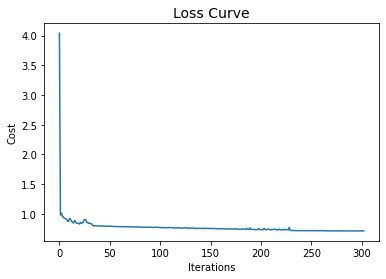

In [22]:
plt.plot(model.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.73      0.59      0.65       350
       happy       0.58      0.51      0.54       373
     neutral       0.61      0.86      0.71       270

    accuracy                           0.63       993
   macro avg       0.64      0.65      0.64       993
weighted avg       0.64      0.63      0.63       993



# Testing with new audio

In [38]:
# newFile = "C:/Users/User/Desktop/diploma/diploma/backend/emotion-recognition/cremad/1002_IOM_HAP_XX.wav"
# newFile = "C:/Users/User/Desktop/diploma/diploma/backend/speech-diarization/working/20_testcall.wav"
newFile = "C:/Users/User/Desktop/diploma/diploma/backend/emotion-recognition/cremad/1002_IOM_ANG_XX.wav"
Audio(newFile)

In [39]:
features = [extract_feature(newFile)]
prediction = model.predict(features)
prediction

C:\Users\User\AppData\Local\Temp\ipykernel_1388\819582568.py:9: FutureWarning: Pass y=[ 3.1121741e-05  7.2854740e-04  8.2093058e-04 ...  1.5887194e-05
  7.6232259e-06 -7.7745153e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


array(['happy'], dtype='<U7')

# For demonstration of difference between features of different emotions.


In [4]:
def waveplot(data, sr):
    plt.figure(figsize=(10,4))
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

def chroma(data, sr):
    x = librosa.feature.chroma_stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

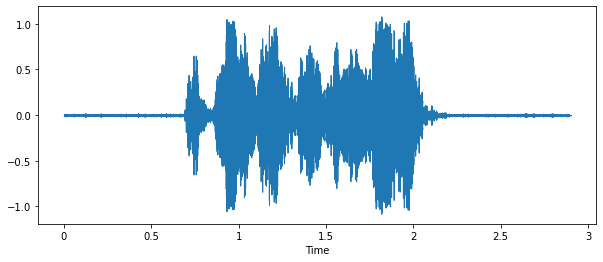

C:\Users\User\AppData\Local\Temp\ipykernel_2024\353288763.py:14: FutureWarning: Pass y=[-0.00073527  0.00027617  0.00140625 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x = librosa.feature.chroma_stft(data)


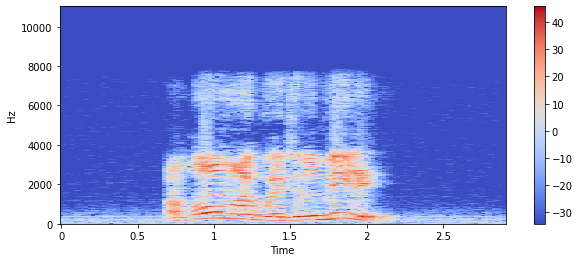

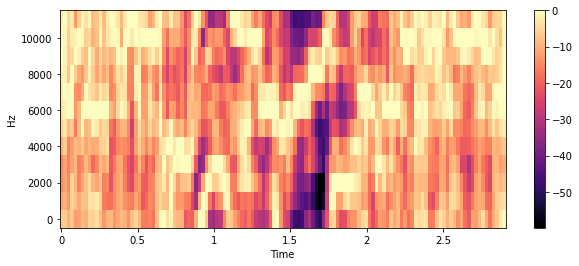

In [6]:
# data, sr = librosa.load("C://Users//User//Desktop//diploma//diploma//backend//emotion-recognition//cremad//1039_IOM_NEU_XX.wav")
data, sr = librosa.load("C://Users//User//Desktop//diploma//diploma//backend//emotion-recognition//cremad//1039_IOM_ANG_XX.wav")
# data, sr = librosa.load("C://Users//User//Desktop//diploma//diploma//backend//emotion-recognition//ravdess//Actor_03//03-01-03-02-01-01-03.wav")
waveplot(data, sr)
spectogram(data, sr)
chroma(data, sr)